In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [73]:
pla = pd.read_csv("PlasticSales.csv") 
pla

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [74]:
pla.isna().sum()

Month    0
Sales    0
dtype: int64

In [75]:
pla.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


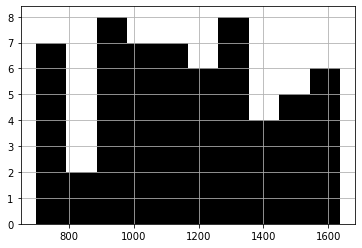

In [76]:
pla['Sales'].hist(color='black');

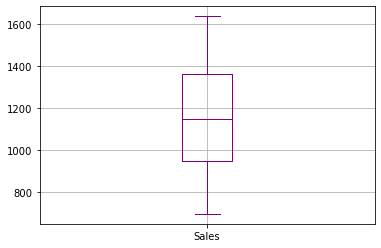

In [77]:
pla.boxplot(color='Purple')

In [78]:
pla.rename(columns={"Sales ('000)":"Sales"},inplace=True)

### Time Series 

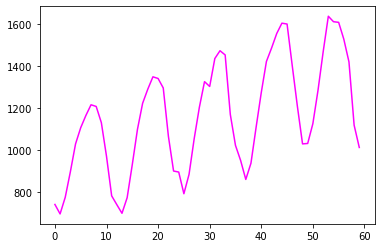

In [79]:
pla.Sales.plot(color='magenta'); # time series plot 

In [80]:
pla.index = pd.to_datetime(pla.Month,format="%b-%y")
pla['year'] = pd.DatetimeIndex(pla['Month']).year
pla['month'] = pd.DatetimeIndex(pla['Month']).month
pla['year']

Month
2049-01-01    2049
2049-02-01    2049
2049-03-01    2049
2049-04-01    2049
2049-05-01    2049
2049-06-01    2049
2049-07-01    2049
2049-08-01    2049
2049-09-01    2049
2049-10-01    2049
2049-11-01    2049
2049-12-01    2049
2050-01-01    2050
2050-02-01    2050
2050-03-01    2050
2050-04-01    2050
2050-05-01    2050
2050-06-01    2050
2050-07-01    2050
2050-08-01    2050
2050-09-01    2050
2050-10-01    2050
2050-11-01    2050
2050-12-01    2050
2051-01-01    2051
2051-02-01    2051
2051-03-01    2051
2051-04-01    2051
2051-05-01    2051
2051-06-01    2051
2051-07-01    2051
2051-08-01    2051
2051-09-01    2051
2051-10-01    2051
2051-11-01    2051
2051-12-01    2051
2052-01-01    2052
2052-02-01    2052
2052-03-01    2052
2052-04-01    2052
2052-05-01    2052
2052-06-01    2052
2052-07-01    2052
2052-08-01    2052
2052-09-01    2052
2052-10-01    2052
2052-11-01    2052
2052-12-01    2052
2053-01-01    2053
2053-02-01    2053
2053-03-01    2053
2053-04-01    2053
2053-0

In [83]:
pla['month']

Month
2049-01-01     1
2049-02-01     2
2049-03-01     3
2049-04-01     4
2049-05-01     5
2049-06-01     6
2049-07-01     7
2049-08-01     8
2049-09-01     9
2049-10-01    10
2049-11-01    11
2049-12-01    12
2050-01-01     1
2050-02-01     2
2050-03-01     3
2050-04-01     4
2050-05-01     5
2050-06-01     6
2050-07-01     7
2050-08-01     8
2050-09-01     9
2050-10-01    10
2050-11-01    11
2050-12-01    12
2051-01-01     1
2051-02-01     2
2051-03-01     3
2051-04-01     4
2051-05-01     5
2051-06-01     6
2051-07-01     7
2051-08-01     8
2051-09-01     9
2051-10-01    10
2051-11-01    11
2051-12-01    12
2052-01-01     1
2052-02-01     2
2052-03-01     3
2052-04-01     4
2052-05-01     5
2052-06-01     6
2052-07-01     7
2052-08-01     8
2052-09-01     9
2052-10-01    10
2052-11-01    11
2052-12-01    12
2053-01-01     1
2053-02-01     2
2053-03-01     3
2053-04-01     4
2053-05-01     5
2053-06-01     6
2053-07-01     7
2053-08-01     8
2053-09-01     9
2053-10-01    10
2053-11-

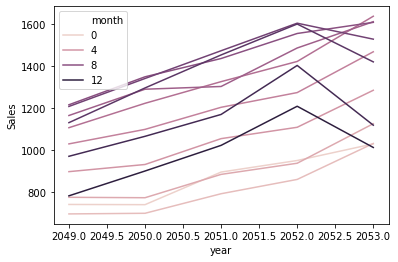

In [84]:
sns.lineplot(x="year",y="Sales",hue="month",data=pla)

# Data Driven Model

### Moving Average

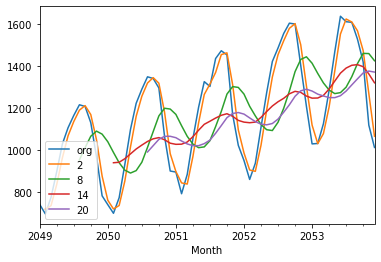

In [85]:
# moving average for the time series to understand better about the trend character 

pla.Sales.plot(label="org")
for i in range(2,24,6):
    pla["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

### Time Series Decomposition 

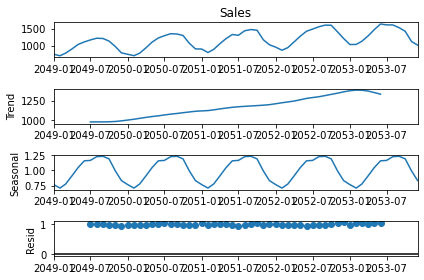

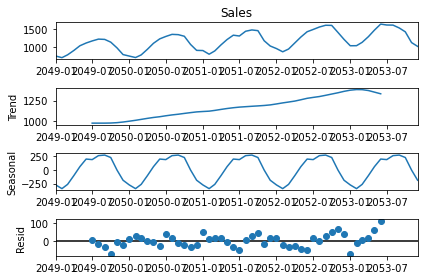

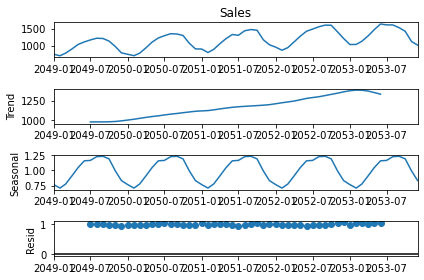

In [86]:
# Time series decomposition plot 

decompose_ts_add = seasonal_decompose(pla.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(pla.Sales,model="multiplicative")
decompose_ts_mul.plot()

### ACF Plots and PACF Plots 

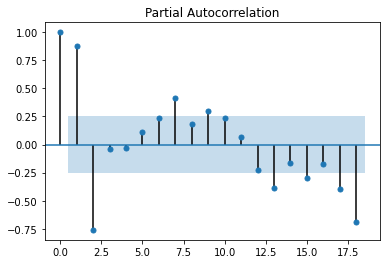

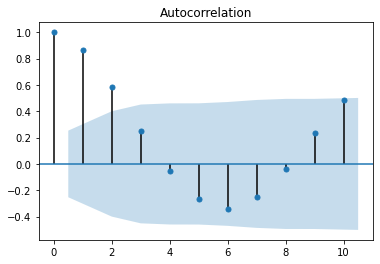

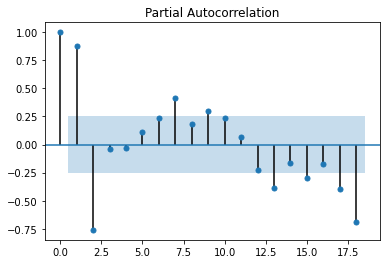

In [87]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(pla.Sales,lags=10)
tsa_plots.plot_pacf(pla.Sales)

In [88]:
# Splitting data
Train = pla.head(50)
Test = pla.tail(11)

In [89]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)


#### Exponential Method

In [90]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


21.462288123424795

#### Holt Method

In [91]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


22.64424878577426

####  Holts winter exponential smoothing with additive seasonality and additive trend

In [92]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


6.499650725115205

####  Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [93]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


12.805680475259438

## Data Driven Final Model 

In [94]:
hwe_model_add_add = ExponentialSmoothing(pla["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [95]:
hwe_model_add_add.forecast(70)

2054-01-01     937.818365
2054-02-01     898.870776
2054-03-01     977.026800
2054-04-01    1125.134921
2054-05-01    1271.163082
                 ...     
2059-06-01    1300.684129
2059-07-01    1297.579717
2059-08-01    1350.041318
2059-09-01    1346.162874
2059-10-01    1297.302884
Freq: MS, Length: 70, dtype: float64

# Model Based Approach

In [96]:
pla = pd.read_csv("PlasticSales.csv")
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
p= pla["Month"][0]
pla['months']=0

month_dummies = pd.DataFrame(pd.get_dummies(pla['months']))
pla1 = pd.concat([pla,month_dummies],axis = 1)

pla1["t"] = np.arange(1,61)

pla1["t_squared"] = pla1["t"]*pla1["t"]
pla1.columns
pla1["log_Rider"] = np.log(pla1["Sales"])
pla1.rename(columns={"Sales": 'Sales'}, inplace=True)

     Month  Sales  months  0   t  t_squared  log_Rider
0   Jan-49    742       0  1   1          1   6.609349
1   Feb-49    697       0  1   2          4   6.546785
2   Mar-49    776       0  1   3          9   6.654153
3   Apr-49    898       0  1   4         16   6.800170
4   May-49   1030       0  1   5         25   6.937314
5   Jun-49   1107       0  1   6         36   7.009409
6   Jul-49   1165       0  1   7         49   7.060476
7   Aug-49   1216       0  1   8         64   7.103322
8   Sep-49   1208       0  1   9         81   7.096721
9   Oct-49   1131       0  1  10        100   7.030857
10  Nov-49    971       0  1  11        121   6.878326
11  Dec-49    783       0  1  12        144   6.663133
12  Jan-50    741       0  1  13        169   6.608001
13  Feb-50    700       0  1  14        196   6.551080
14  Mar-50    774       0  1  15        225   6.651572
15  Apr-50    932       0  1  16        256   6.837333
16  May-50   1099       0  1  17        289   7.002156
17  Jun-50

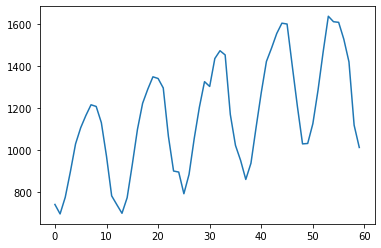

In [97]:
Train = pla1.head(50)
Test = pla1.tail(11)
print(pla1)
pla1.Sales.plot()

In [98]:
pla1["Date"] = pd.to_datetime(pla1.Month,format="%b-%y")
pla1["month"] = pla1.Date.dt.strftime("%b") # month extraction
pla1["year"] = pla1.Date.dt.strftime("%Y") # year extraction
Train1 = pla.head(50)
Test1 = pla.tail(11)
pla1

,Month,Sales,months,0,t,t_squared,log_Rider,Date,month,year
0,Jan-49,742,0,1,1,1,6.609349,2049-01-01,Jan,2049
1,Feb-49,697,0,1,2,4,6.546785,2049-02-01,Feb,2049
2,Mar-49,776,0,1,3,9,6.654153,2049-03-01,Mar,2049
3,Apr-49,898,0,1,4,16,6.800170,2049-04-01,Apr,2049
4,May-49,1030,0,1,5,25,6.937314,2049-05-01,May,2049
5,Jun-49,1107,0,1,6,36,7.009409,2049-06-01,Jun,2049
6,Jul-49,1165,0,1,7,49,7.060476,2049-07-01,Jul,2049
7,Aug-49,1216,0,1,8,64,7.103322,2049-08-01,Aug,2049
8,Sep-49,1208,0,1,9,81,7.096721,2049-09-01,Sep,2049
9,Oct-49,1131,0,1,10,100,7.030857,2049-10-01,Oct,2049


### Heat Map 

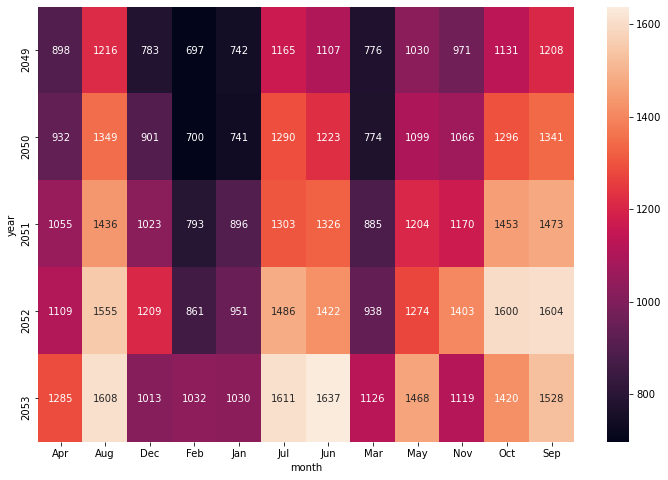

In [99]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=pla1,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

### Boxplots 

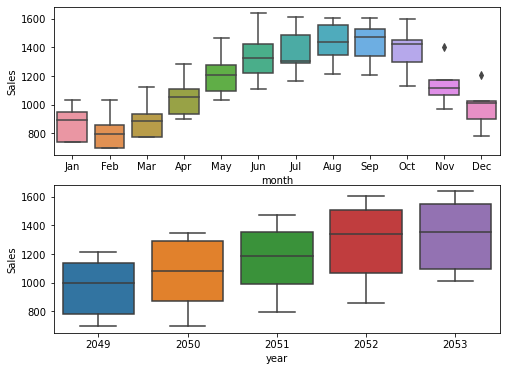

In [100]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=pla1)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=pla1)

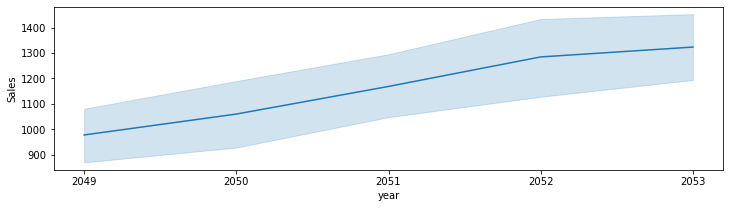

In [101]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=pla1)

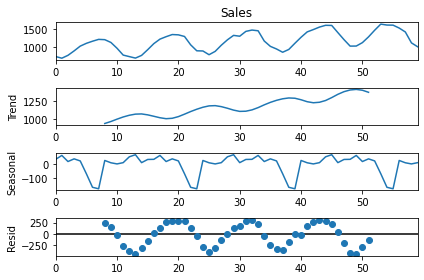

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(pla1.Sales,period=16)
decompose_ts_add.plot()
plt.show() 

#### Linear Model

In [103]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

234.26485926524037

####  Exponential

In [104]:
Exp = smf.ols('log_Rider~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

236.20886507322803

#### Quadratic 

In [105]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

231.43841735408392

#### Additive Seasonality 

In [106]:
add_sea = smf.ols('Sales~months',data=Train1).fit()
pred_add_sea = pd.Series(add_sea.predict(Test1[['months']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

327.23904073600113

In [107]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
2,rmse_Quad,231.438417
0,rmse_linear,234.264859
1,rmse_Exp,236.208865
3,rmse_add_sea,327.239041


In [108]:
predict_data = pd.read_csv("Predict_new (2).csv")   

In [109]:
predict_data  

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [110]:
model_full = smf.ols('Sales~t+t_squared',data=pla1).fit()   

In [111]:
pred_new  = pd.Series(Quad.predict(predict_data)) 
pred_new

0     977.375116
1     966.033176
2     954.541034
3     942.898692
4     931.106149
5     919.163405
6     907.070460
7     894.827314
8     882.433968
9     869.890420
10    857.196672
11    844.352723
dtype: float64

In [112]:
predict_data["forecasted_Plastic"] = pd.Series(pred_new) 
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared,forecasted_Plastic
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,977.375116
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,966.033176
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,954.541034
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,942.898692
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,931.106149
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,919.163405
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,907.070460
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,894.827314
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,882.433968
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,869.890420
